###### Humans and alien image classification

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing the libraries
import os
import random
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

# loading the dataset

In [4]:
folder_path = "humansAliens"

# Dictionary to map folder names to integer labels
label_mapping = {
    'aliens': 0,
    'humans': 1
}

# Function to check if a file has a valid image extension
def is_image_file(filename):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
    return any(filename.lower().endswith(ext) for ext in valid_extensions)

# Function to load images from a folder and store them in a list
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        if not os.path.isdir(label_path):
            continue

        label_value = label_mapping.get(label)
        if label_value is None:
            continue

        for filename in os.listdir(label_path):
            if is_image_file(filename):
                img_path = os.path.join(label_path, filename)
                img = Image.open(img_path)
                images.append(img)
                labels.append(label_value)
    return images, labels

# Load images and labels from the folder
images, labels = load_images_from_folder(folder_path)


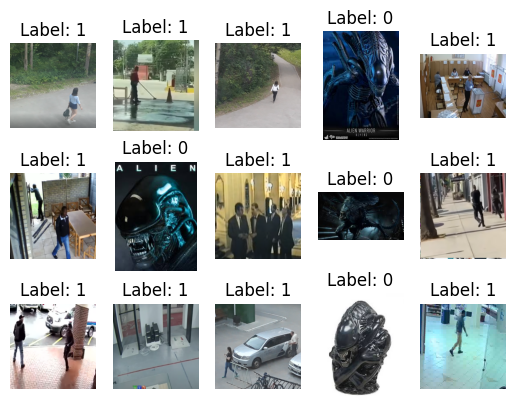

In [5]:
# Choose 15 random indices from the images list
num_images_to_display = 15
random_indices = random.sample(range(len(images)), num_images_to_display)

# Display the randomly selected images
for i, idx in enumerate(random_indices):
    plt.subplot(3, 5, i+1)  # Adjust the subplot layout to display 15 images in a 3x5 grid
    plt.imshow(images[idx])
    plt.title("Label: " + str(labels[idx]))
    plt.axis('off')

plt.show()

### Preprocessing the data

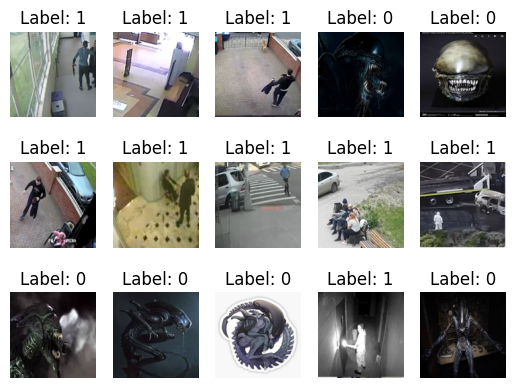

In [6]:
import random

# Preprocessing: Resize images
image_size = (128, 128)
images_resized = [img.resize(image_size) for img in images]

# Display random 15 images
num_images_to_display = 15
random_indices = random.sample(range(len(images_resized)), num_images_to_display)

for i, index in enumerate(random_indices):
    plt.subplot(3, 5, i+1)  # 3 rows and 5 columns for 15 images
    plt.imshow(images_resized[index])
    plt.title("Label: " + str(labels[index]))
    plt.axis('off')

plt.show()

### Spliting the dataset

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images_resized, labels, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Number of training images:", len(train_images))
print("Number of testing images:", len(test_images))


Number of training images: 724
Number of testing images: 182


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from PIL import Image

In [9]:
# Resize and convert images to grayscale
image_size = (128, 128)

def preprocess_images(images):
    processed_images = []
    for img in images:
        try:
            resized_img = img.resize(image_size).convert('L')
            processed_images.append(resized_img)
        except:
            print("Error processing an image. Skipping...")
    return processed_images

train_images_resized = preprocess_images(train_images)
test_images_resized = preprocess_images(test_images)

# Convert PIL images to NumPy arrays
train_images = np.array([np.array(img) for img in train_images_resized])
test_images = np.array([np.array(img) for img in test_images_resized])

# Convert train_labels to NumPy array
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Normalize the pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

Other functions

In [10]:
def tabluate_result(history):
    return pd.DataFrame(history.history)

In [11]:
def training_mean_results(history):
    return pd.DataFrame(tabluate_result(history).mean(),columns=["Value"]).style.set_caption('Training Mean')

underfitting model

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
underfitting_model = Sequential()

# Convolutional layers
underfitting_model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 1)))
underfitting_model.add(MaxPooling2D(2, 2))
underfitting_model.add(Conv2D(32, (3, 3), activation='relu'))
underfitting_model.add(MaxPooling2D(2, 2))

# Flatten the output before feeding into the fully connected layers
underfitting_model.add(Flatten())

# Fully connected layers
underfitting_model.add(Dense(64, activation='relu'))

# Compile the model
underfitting_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
underfitting_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 64)                1

In [15]:
# Train the model
underfittingModel_result = underfitting_model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
23/23 [==============================] - 1s 35ms/step - loss: 0.9044 - accuracy: 0.4862
Epoch 2/5
23/23 [==============================] - 1s 35ms/step - loss: 0.5875 - accuracy: 0.3674
Epoch 3/5
23/23 [==============================] - 1s 34ms/step - loss: 0.6215 - accuracy: 0.3688
Epoch 4/5
23/23 [==============================] - 1s 33ms/step - loss: 0.6166 - accuracy: 0.3674
Epoch 5/5
23/23 [==============================] - 1s 35ms/step - loss: 0.5951 - accuracy: 0.3674


In [16]:
tabluate_result(underfittingModel_result)

,loss,accuracy
0,0.904353,0.486188
1,0.587479,0.367403
2,0.621504,0.368785
3,0.616582,0.367403
4,0.595147,0.367403


In [17]:
training_mean_results(underfittingModel_result)

,Value
loss,0.665013
accuracy,0.391436


In [18]:
# Evaluate the underfitting model on the test dataset
underfitting_evaluation_results = underfitting_model.evaluate(test_images, test_labels)

# Print the evaluation results (usually contains the loss and accuracy)
print("Test Loss:", underfitting_evaluation_results[0])
print("Test Accuracy:",underfitting_evaluation_results[1])

6/6 [==============================] - 0s 10ms/step - loss: 0.6520 - accuracy: 0.4451
Test Loss: 0.6520390510559082
Test Accuracy: 0.44505494832992554


### Over-fitting model

In [19]:
from tensorflow.keras.layers import Dropout

overfitting_model = Sequential()

# Convolutional layers (increased complexity)
overfitting_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
overfitting_model.add(MaxPooling2D(2, 2))
overfitting_model.add(Conv2D(64, (3, 3), activation='relu'))
overfitting_model.add(MaxPooling2D(2, 2))
overfitting_model.add(Conv2D(128, (3, 3), activation='relu'))
overfitting_model.add(MaxPooling2D(2, 2))

# Flatten the output before feeding into the fully connected layers
overfitting_model.add(Flatten())

# Fully connected layers (more neurons)
overfitting_model.add(Dense(256, activation='relu'))
overfitting_model.add(Dropout(0.5))  # Reduced dropout

# Compile the model
overfitting_model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
overfitting_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
overfitting_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 128)      

In [21]:
# Train the model
overfittingModel_result = overfitting_model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
23/23 [==============================] - 3s 95ms/step - loss: 0.5816 - accuracy: 0.7127
Epoch 2/5
23/23 [==============================] - 2s 98ms/step - loss: 0.3264 - accuracy: 0.8840
Epoch 3/5
23/23 [==============================] - 2s 97ms/step - loss: 0.2136 - accuracy: 0.9240
Epoch 4/5
23/23 [==============================] - 2s 100ms/step - loss: 0.1972 - accuracy: 0.9282
Epoch 5/5
23/23 [==============================] - 2s 99ms/step - loss: 0.1675 - accuracy: 0.9392


In [22]:
tabluate_result(overfittingModel_result)

,loss,accuracy
0,0.581554,0.712707
1,0.326360,0.883978
2,0.213641,0.924033
3,0.197165,0.928177
4,0.167520,0.939227


In [23]:
training_mean_results(overfittingModel_result)

,Value
loss,0.297248
accuracy,0.877624


In [24]:
# Evaluate the overfitting model on the test dataset
overfitting_evaluation_results = overfitting_model.evaluate(test_images, test_labels, verbose=1)

# Print the evaluation results (usually contains the loss and accuracy)
print("Test Loss:", overfitting_evaluation_results[0])
print("Test Accuracy:", overfitting_evaluation_results[1])

6/6 [==============================] - 0s 29ms/step - loss: 0.1977 - accuracy: 0.9341
Test Loss: 0.19766239821910858
Test Accuracy: 0.9340659379959106


#### Final Model

In [25]:
from tensorflow.keras.regularizers import l2

final_model = Sequential()

# Convolutional layers (increased complexity)
final_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
final_model.add(MaxPooling2D(2, 2))
final_model.add(Conv2D(64, (3, 3), activation='relu'))
final_model.add(MaxPooling2D(2, 2))
final_model.add(Conv2D(128, (3, 3), activation='relu'))
final_model.add(MaxPooling2D(2, 2))

# Flatten the output before feeding into the fully connected layers
final_model.add(Flatten())

# Fully connected layers (more neurons and L2 regularization)
final_model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
final_model.add(Dropout(0.5))  # Dropout for regularization
final_model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
final_model.add(Dropout(0.5))  # Dropout for regularization

# Compile the model
final_model.add(Dense(1, activation='sigmoid'))
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
final_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 128)      

In [39]:
# Train the model
epochs = 5
history = final_model.fit(train_images, train_labels, epochs=epochs, batch_size=32)

Epoch 1/5
23/23 [==============================] - 2s 108ms/step - loss: 0.5957 - accuracy: 0.9033
Epoch 2/5
23/23 [==============================] - 2s 100ms/step - loss: 0.5369 - accuracy: 0.9033
Epoch 3/5
23/23 [==============================] - 2s 101ms/step - loss: 0.4193 - accuracy: 0.9392
Epoch 4/5
23/23 [==============================] - 2s 109ms/step - loss: 0.3670 - accuracy: 0.9392
Epoch 5/5
23/23 [==============================] - 2s 102ms/step - loss: 0.3727 - accuracy: 0.9309


In [29]:
tabluate_result(history)

,loss,accuracy
0,3.492260,0.649171
1,1.454120,0.857735
2,1.064600,0.882597
3,0.742011,0.918508
4,0.621751,0.928177


In [30]:
training_mean_results(history)

,Value
loss,1.474949
accuracy,0.847238


In [ ]:
# Evaluate the overfitting model on the test dataset
final_evaluation_results = final_model.evaluate(test_images, test_labels, verbose=1)

# Print the evaluation results (usually contains the loss and accuracy)
print("Test Loss:", final_evaluation_results[0])
print("Test Accuracy:", 
print("test accuracy:" + str(final_evaluation_results[1]*100))]) # The final accuracy

In [ ]:
# Evaluation results

In [31]:
#initialising predicted values
predicted_values=final_model.predict(test_images)

#reshaping values from 10 to values between -1 and 1
test_labels=test_labels.reshape(-1,1)
predicted_values=predicted_values.reshape(-1,1)

test_labels=np.argmax(test_labels,axis=1)
predicted_values=np.argmax(predicted_values,axis=1)

6/6 [==============================] - 0s 26ms/step


In [34]:
#calculating and obtaining values
precision_value=precision_score(test_labels,predicted_values,average='micro')
recall_value=recall_score(test_labels,predicted_values,average='micro')
f1_value=f1_score(test_labels,predicted_values,average='micro')

In [33]:
print("Precision value:",precision_value)
print("Recall value:",recall_value)
print("F1 score:",f1_value)

Precision value: 1.0
Recall value: 1.0
F1 score: 1.0


Text(95.72222222222221, 0.5, 'truth')

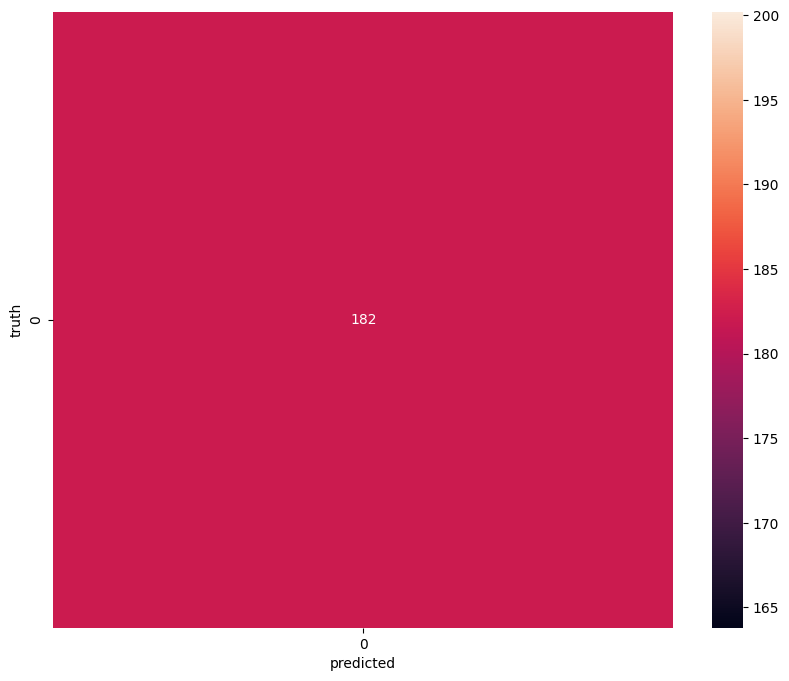

In [35]:
#confusion matrix
conf_Mat=confusion_matrix(test_labels,predicted_values)
plt.figure(figsize=(10,8))
sns.heatmap(conf_Mat,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


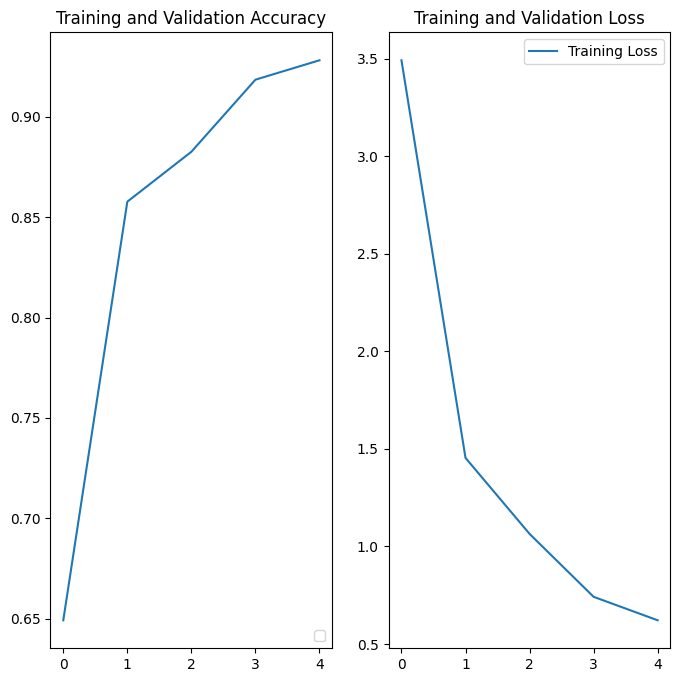

In [37]:
acc = history.history['accuracy']
loss = history.history['loss']



epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, acc, label='Training Accuracy')



plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

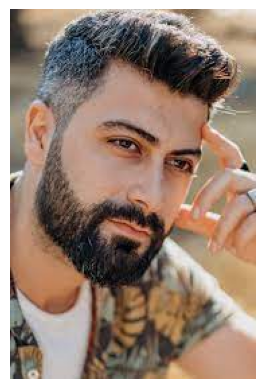

In [42]:
def visualize_image(image_path):
    image = Image.open(image_path)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    image_path = "/Users/premkumar/new photo/handsome man.jpeg"
    visualize_image(image_path)
    
image = tf.keras.utils.load_img(image_path)
